In [2]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt

# Machine Learning Week 1: Curve Fitting

### Name: Rishi Kalra
### Student Number: 20004926

In this notebook, a polynomial function will be fitted using gradient descent, which will be implemented using 'pure' python. 


The polynomial function equation is

$$ f(\theta_{i}, x)= \sum_{i}{\theta_{i} x^{i}} $$ (1)



The partial derivative with respect to $\theta_{i}$ is given by:

$$ \frac{df(\theta_{i}, x)}{d\theta_{i}} =  \sum_{i}{x^i} $$ (2)

Firstly, equations (1) and (2) have been coded into functions fPoly and polyGradient, respectively, as shown in the code cell below. 


Gaussian noise has been added to the function in equation (1), which has been coded in the function polyModelWithNoise.

Finally, the loss function (fake chi-squared) has been coded into the function get_avg_fake_chisquared.



### Defining functions

In [3]:
# Define functions that will be used

# Polynomial
def fPoly(x, theta):

  '''
  This function will define the polynomial function
  Inputs: x (x-values), theta (polynomial parameters) 
  Outputs: y (y-values)
  '''

  # Initialise y
  y = 0

  # Summation
  for i in range(len(theta)):
     y += (theta[i]*x**(i))

  return y

# Add noise
def polyModelWithNoise(x, theta, sigma):
  
  '''
  This function will add some Gaussian noise to the result of the function f
  Inputs: x (x-values), theta (polynomial parameters), sigma (standard deviation of the noise distribution)
  Outputs: addNoise (the function f added with the gaussian noise)
  '''

  # Add some Gaussian noise to the result of the function f
  mu = np.mean(fPoly(x, theta))
  gaussianNoise = np.random.normal(fPoly(x,theta), sigma)
  addNoise =  gaussianNoise

  # Return noisy data
  return addNoise

# Return gradient of polynomial function with respect to the parameters theta
def polyGradient(x, theta):

  '''
  This function will take the gradient of the polynomial function with respect to the parameters theta
  Inputs: x (x-values), theta (polynomial parameters)
  Outputs: gradients (array of gradients wrt each theta)
  '''

  # Initialise the gradient
  gradients = np.zeros((len(theta), len(x)))

    # Take the gradient wrt each theta
  for i in range(len(theta)):
        gradients[i] = x**(i)

  return gradients

# Define samples
def samples(nsamples, width=1): # default width is 1
    """
    This function will return an array of random numbers within a given width
    Inputs:nsamples (length of the random samples array)
    Returns: sample (array of random numbers)
    """
    sample = (np.random.uniform(0, width, nsamples))

    return sample

# Loss function (fake chi-squared)
def get_avg_fake_chisq(x, theta_truth, theta, sigma):

    """
    This function returns the average fake chi-squared
    Inputs: x (x-values), 
    """
    # Generate y data values using true theta
    y_data=polyModelWithNoise(x, theta_truth, sigma)

    # Generate y model values
    y_model=fPoly(x, theta)

    # Calculate the loss (average fake chi-squared)
    loss = np.mean((y_data - y_model)**2)

    return loss

### Plotting noisy data

Using the polyModelWithNoise function, a sample of 100 points has been plotted, linearly arranged between 0 and 1, with theta parameters of [0,2] and a noise sigma of 0.5. The noise is Gaussian.

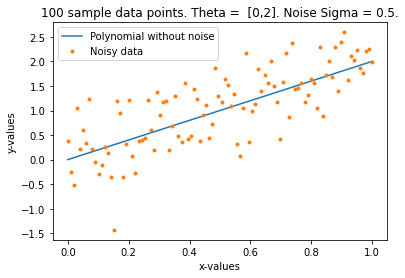

In [4]:
# Generate sample of 100 points
x1 = np.linspace(0, 1, 100)

# Theta parameters, noise standard deviation
thetaParams = [0,2]
noiseSigma = 0.5

# Generate noisy data points
y = polyModelWithNoise(x1, thetaParams, noiseSigma)

# Plot the sample data
plt.title('100 sample data points. Theta =  [0,2]. Noise Sigma = 0.5.')
plt.plot(x1, fPoly(x1, thetaParams), label='Polynomial without noise')
plt.plot(x1, y, '.', label='Noisy data')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend()


### Gradient Descent

The gradient descent algorithm has been implemented below (in the function gradientDescent). The function returns the loss values and new updated theta value.

In [5]:
def gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate):

  '''
  This function will perform gradient descent
  Inputs: theta (initial theta), theta_truth (true theta value), num_iterations (number of interations), sigma (noise sigma), learning_rate (learning rate)
  Outputs: loss_values (loss values), theta (final theta value)
  '''

  # Initialise empty list to store loss values
  loss_values = []

  # Loop for num_iterations
  for i in range(num_iterations):

      # Generate a sample of 10 random x values
      x = samples(10)
      
      # Generate 10 y data values
      y_data = polyModelWithNoise(x, theta_truth, sigma)
      
      # Generate 10 y model values
      y_model = fPoly(x, theta)
      
      # Calculate loss
      loss = get_avg_fake_chisq(x, theta_truth, theta, sigma)
      
      # Store loss value
      loss_values.append(loss)
      
      # Calculate gradient
      gradient = polyGradient(x, theta)

      # Deviation
      deviation = y_model - y_data
      
      # Update theta values (looping over each theta)
      for j in range(len(theta)):
          theta[j] -= learning_rate * (np.sum((deviation) * gradient[j])/10) # Divide by 10 for the average

  return loss_values, theta

The gradientDescent function has been implemented below to optimise the theta values. The loss (fake chi-squared) has been plotted agains the step (iteration number). It may be seen that the loss sharply drops off at approximately 10 iterations and remains in a constant range from 10 to 1000 iterations.

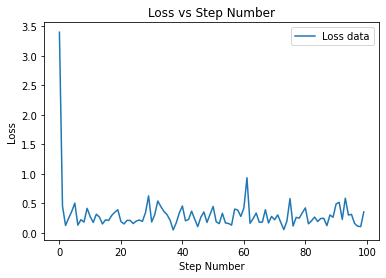

In [6]:
# Get the theta and loss values
loss_values, theta = gradientDescent(theta=[-1,0.5], theta_truth=[0,2], num_iterations=100, sigma=0.5, learning_rate=0.5)

# Plot the loss against the step
plt.figure()
plt.title('Loss vs Step Number')
plt.plot(loss_values, label='Loss data')
plt.xlabel('Step Number')
plt.ylabel('Loss')
plt.legend()

Above is the plot of loss value against step number. It can be seen there is a sharp fall off and convergence to between y = 0 and 0.5. This looks as expected, since the aim is to minimise the loss (fake chi-squared) with gradient descent.

The gradientDescent function is now used again, but for a third order polynomial with parameters $\theta = [0,2,2,2]$ with the same noise as before. The respective loss was plotted against step number.

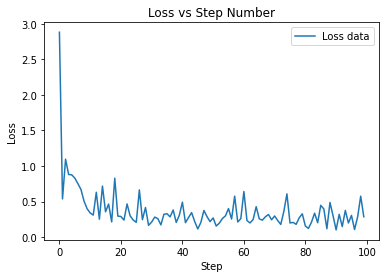

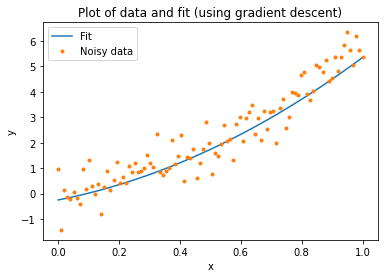

In [7]:
# True theta value
theta_truth = [0, 2, 2, 2]

# Initial theta
theta = [1, 1, 1]

# Learning rate
learning_rate = 0.5

# Params
num_iterations = 100
sigma=0.5

# For third order polynomial using the same noise as before
loss_values, theta = gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate)

# Plot the loss against step number
plt.figure()
plt.title('Loss vs Step Number')
plt.plot(loss_values, label='Loss data')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Plot the fit
x = np.linspace(0,1,100)
y_model = fPoly(x, theta)
y_data = polyModelWithNoise(x, theta_truth, sigma)

plt.figure()
plt.title('Plot of data and fit (using gradient descent)')
plt.plot(x, y_model, label='Fit')
plt.plot(x, y_data, '.', label='Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Above is first the plot of loss against step number, which again shows a steep decline as before. This again indicates that the theta values appear to create a relatively good polynomial fit to the data, at least within x = 0 to 1. This can be seen in the second plot of the model against the data.

### Fitting to 3rd order polynomial data

#### Fitting a 1st order polynomial to 3rd order data:

Now let's switch to testing using a third order polynomial with parameters θ=[0,2,2,2] using the same noise as before

Fit this third order polynomial data using a 1st order polynomial, 3rd order polynomial and 7th order polynomial using a stochastic gradient algorithm that samples 10 x values between 0 and 1 (and their associated y-values). Below is the plot of loss against step number, and the noisy data and polynomial fit for the 1st order polynomial.

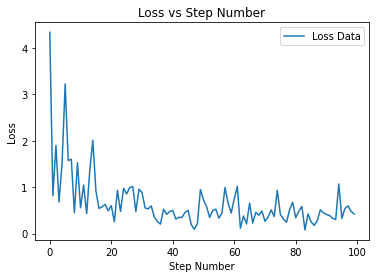

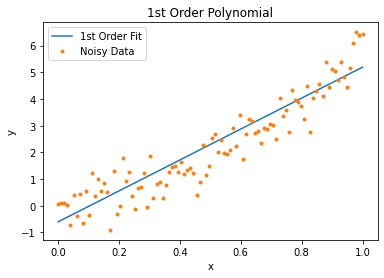

In [8]:
# Params
learning_rate = 0.5
num_iterations = 100
sigma=0.5

# First order polynomial
theta = [1,1]
theta_truth = [0, 2, 2, 2]

# Get the updated theta and loss values
loss_values, theta = gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate)

# Plot the loss values
plt.figure()
plt.title('Loss vs Step Number')
plt.plot(loss_values, label='Loss Data')
plt.xlabel('Step Number')
plt.ylabel('Loss')
plt.legend()

# Plot the 1st order polynomial fit
x = np.linspace(0,1,100)
y_model = fPoly(x, theta)
y_data = polyModelWithNoise(x, theta_truth, sigma)

# Plot of 1st order polynomial
plt.figure()
plt.title('1st Order Polynomial')
plt.plot(x, y_model, label='1st Order Fit')
plt.plot(x, y_data, '.', label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Above in the first plot is the plot of loss against step number. The plot shows the loss declining as step number is increased towards 100. However, it is not a very steep decline as seen before. Secondly, the loss appears to generally converge to the range y = 0 to 1.5. 

In the second plot of the model and the data, it can be seen that within the range x = 0.3 to x = 0.7, the model becomes a slightly worse fit, with the majority of the data points on one side of the fit line. It seems likely that the linear model is not the best model for the data.


#### Fit a 3rd order polynomial to 3rd order data

Below is the third order polynomial. Initial guesses of theta parameters of 1 have been used.

Text(0, 0.5, 'y')

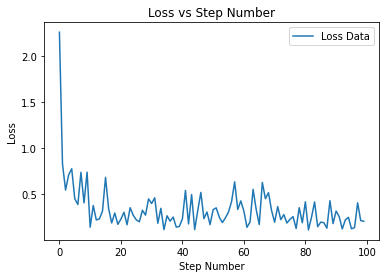

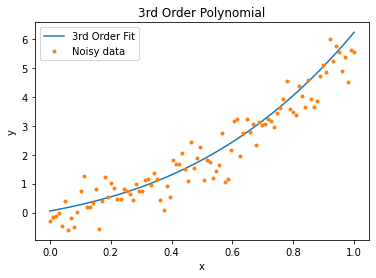

In [9]:
# Third order polynomial
theta = [1, 1, 1, 1]
theta_truth = [0, 2, 2, 2]

# Gradient descent
loss_values, theta = gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate)

# Plot the loss against step number
plt.figure()
plt.title('Loss vs Step Number')
plt.plot(loss_values, label='Loss Data')
plt.xlabel('Step Number')
plt.ylabel('Loss')
plt.legend()

# Y-values
x = np.linspace(0,1,100)
y_model = fPoly(x, theta)
y_data = polyModelWithNoise(x, theta_truth, sigma)

# Plot the data and fit
plt.figure()
plt.title('3rd Order Polynomial')
plt.plot(x, y_model, label='3rd Order Fit')
plt.plot(x, y_data, '.', label='Noisy data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

The first plot shows the loss converging to a range with much smaller magnitude (y = 0 to 0.6) than before. This suggests this is a better fit than the 1st order fit. This can also be seen visually in the second plot. This matches what we expect when fitting a third order polynomial to third order data.

#### Fitting a 7th order polynomial to 3rd order data

Next, a 7th order polynomial will be fitted to the 3rd order data.

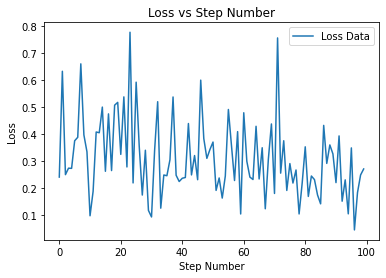

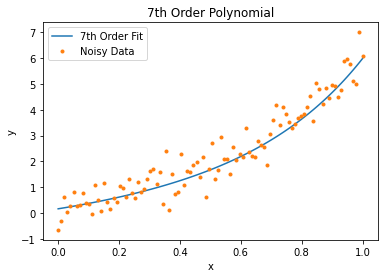

In [10]:
# Seventh order polynomial
theta = np.ones(8)
theta_truth = [0, 2, 2, 2]

# Gradient descent
loss_values, theta = gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate)

# Plot the loss
plt.figure()
plt.title('Loss vs Step Number')
plt.plot(loss_values, label='Loss Data')
plt.xlabel('Step Number')
plt.ylabel('Loss')
plt.legend()

# x and y values
x = np.linspace(0,1,100)
y_model = fPoly(x, theta)
y_data = polyModelWithNoise(x, theta_truth, sigma)

# Plot the polynomial
plt.figure()
plt.title('7th Order Polynomial')
plt.plot(x, y_model, label='7th Order Fit')
plt.plot(x, y_data, '.', label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In this case, the plot of loss function against step number looks very different. There is no steep decline as seen before, instead the plot looks quite noisy. However the magnitude of loss is quite small, with only one data point above y = 1. 

### Plotting 3rd order polynomial model

Below, the third order polynomial data was plotted over an expanded x-range of -0.5,1.5 (with linearly spaced x values).

Text(0, 0.5, 'y')

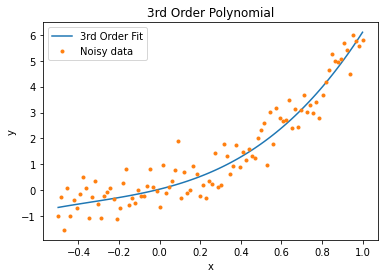

In [11]:
# Third order polynomial
theta = [1, 1, 1, 1]
theta_truth = [0, 2, 2, 2]

# Gradient descent
loss_values, theta = gradientDescent(theta, theta_truth, num_iterations, sigma, learning_rate)

# Y-values
x = np.linspace(-0.5,1,100)
y_model = fPoly(x, theta)
y_data = polyModelWithNoise(x, theta_truth, sigma)

# Plot the data and fit
plt.figure()
plt.title('3rd Order Polynomial')
plt.plot(x, y_model, label='3rd Order Fit')
plt.plot(x, y_data, '.', label='Noisy data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

This appears to fit fairly well to the data, which makes sense since the data was generated from a third order polynomial (theta), with noise added to it. The data points seem evenly distributed on each side of the curve. Analysis of residuals has been done at the end of the notebook.

### Analysis and Residuals

To compare the noisy data to the three models (trained over the range x=0,1), including over regions of x where they were not trained, the models have been plotted below with x ranges going up to x = -6 to 6. Ranges have been labelled on each of the plots.




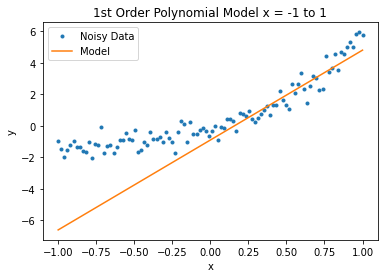

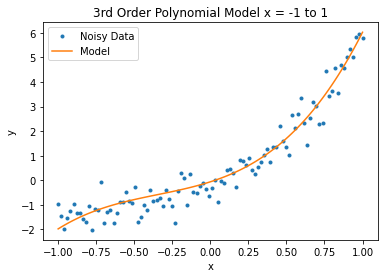

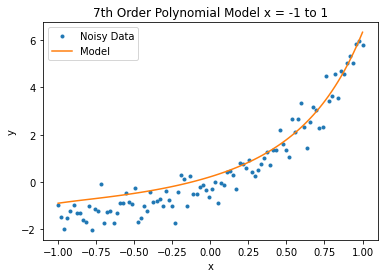

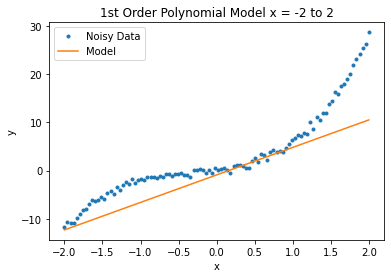

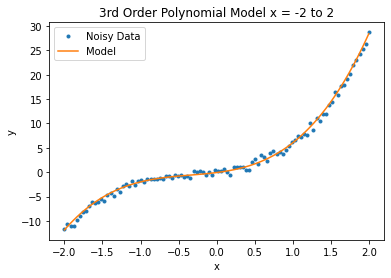

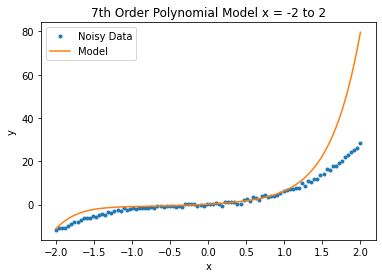

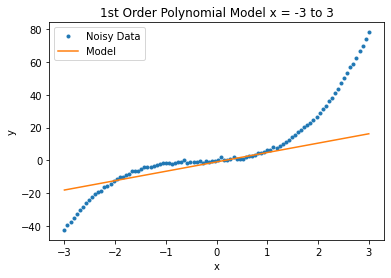

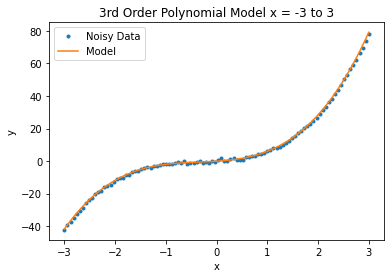

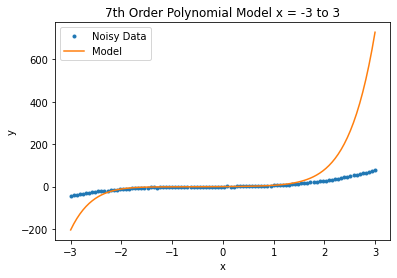

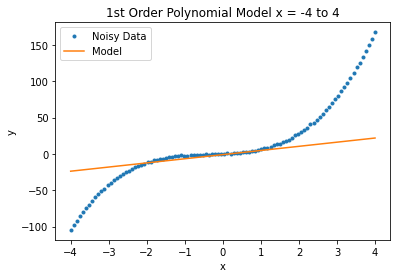

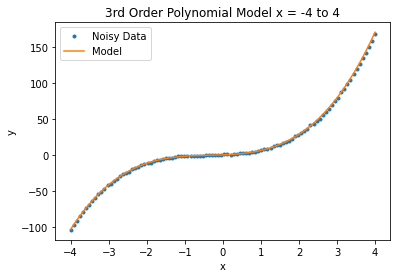

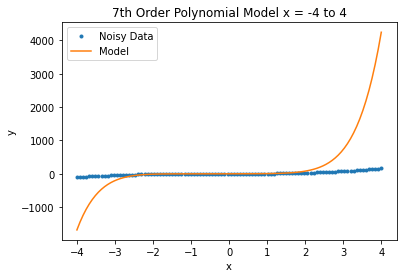

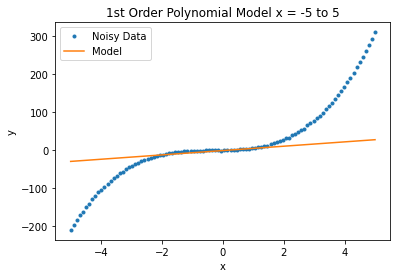

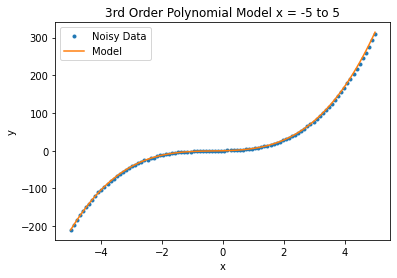

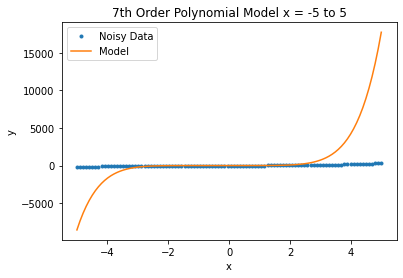

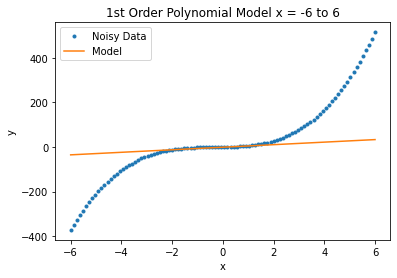

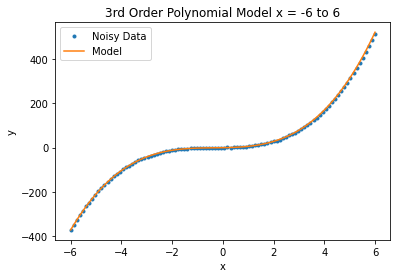

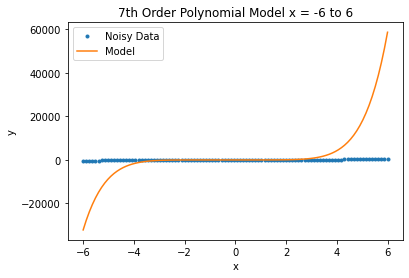

In [12]:
# Params
num_iterations = 100
sigma = 0.5
learning_rate = 0.5

# Theta values
theta_truth = [0, 2, 2, 2]

# First order polynomial
theta1 = [1,1]

# Third order polynomial
theta2 = [1, 1, 1, 1]

# Seventh order polynomial
theta3 = np.ones(8)

# Gradient descent
loss_values1, theta1 = gradientDescent(theta1, theta_truth, num_iterations, sigma, learning_rate)
loss_values2, theta2 = gradientDescent(theta2, theta_truth, num_iterations, sigma, learning_rate)
loss_values3, theta3 = gradientDescent(theta3, theta_truth, num_iterations, sigma, learning_rate)

for i in range(6):

  # x and y values
  x = np.linspace(-i-1,i+1,100)
  y_model1 = fPoly(x, theta1)
  y_model2 = fPoly(x, theta2)
  y_model3 = fPoly(x, theta3)
  y_data = polyModelWithNoise(x, theta_truth, sigma)


  # Plot the polynomials
  plt.figure()
  plt.title(f'1st Order Polynomial Model x = {-i-1} to {i+1}')
  plt.plot(x, y_data, '.', label='Noisy Data')
  plt.plot(x, y_model1, label='Model')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.figure()
  plt.title(f'3rd Order Polynomial Model x = {-i-1} to {i+1}')
  plt.plot(x, y_data, '.', label='Noisy Data')
  plt.plot(x, y_model2, label='Model')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.figure()
  plt.title(f'7th Order Polynomial Model x = {-i-1} to {i+1}')
  plt.plot(x, y_data, '.', label='Noisy Data')
  plt.plot(x, y_model3, label='Model')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

1. The 1st Order model shows a good fit in the region it has been trained (x=0,1). However, outside this region it does not accurately fit the data.

2. The 3rd order model shows a good fit in a wider region compared to the 1st order model. The shape of the fit follows that of the data, however as x increases beyond approximately +4.5 or decreases below approximately -4.5, there is a slight offset of the model compared to the data.

3. The 7th order model shows a good fit from x=-1,+1, however, as x increases beyond 1.5 or decreases below -1.5, the model diverges significantly from the data points.

Overall we can see that the 3rd order polynomial gives the best fit, since outside the range where the model was trained, the 1st and 7th order models deviate a lot from the data.

The 3rd order deviates a little outside this range but still follows the same general trend as the data.

To verify (and quantify) this, below is the squared residuals plotted for each model in the range x=-6 to x=6.

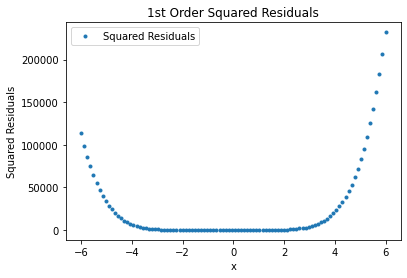

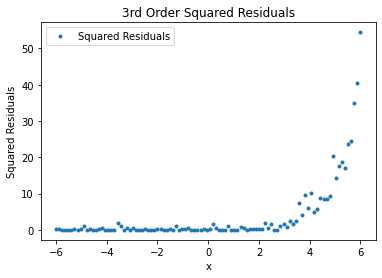

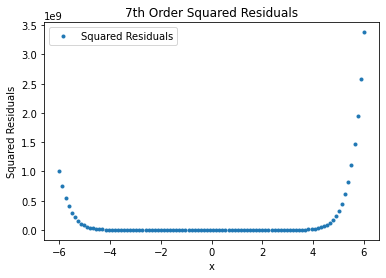

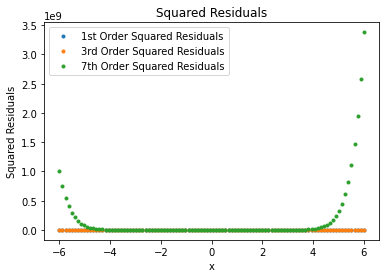

In [13]:
def ResidualsSqr(y_data, y_model):
  ''' 
  This function will calculate the squared residuals
  Inputs: y_data (data y-values), y_model (model y-values)
  Outputs: residuals (array of squared residuals)
  '''
  # Calculate residuals
  residuals = ((y_data - y_model)**2)
  return residuals

# Plot the residuals for each
plt.figure()
plt.title('1st Order Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model1), '.', label='Squared Residuals')
plt.ylabel('Squared Residuals')
plt.xlabel('x')
plt.legend()

plt.figure()
plt.title('3rd Order Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model2), '.', label='Squared Residuals')
plt.ylabel('Squared Residuals')
plt.xlabel('x')
plt.legend()

plt.figure()
plt.title('7th Order Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model3), '.', label='Squared Residuals')
plt.ylabel('Squared Residuals')
plt.xlabel('x')
plt.legend()

# Plot them all together
plt.figure()
plt.title('Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model1), '.', label='1st Order Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model2), '.', label='3rd Order Squared Residuals')
plt.plot(x, ResidualsSqr(y_data, y_model3), '.', label='7th Order Squared Residuals')
plt.ylabel('Squared Residuals')
plt.xlabel('x')
plt.legend()



1. The squared residuals for the 1st order model show it has a relatively small deviation from the data (squared residuals near zero) from x=-2 to x=2. Beyond this point (in either direction), the squared residuals increase exponentially, meaning the model becomes progressively worse as you leave this region. The magnitude of squared residuals also increases to the order of 10,000 outside of the region.

2. The squared residuals for the 3rd order model show a declining trend as x goes from -5 to 4, where it converges to around zero. However beyond x = +4, the squared residuals begin to increase (appears to be exponentially). The order of magnitude of the squared residuals is around 1 to 10, and reaches 100 beyond x = 6, suggesting it is a significantly better model to the data than the other models (overall).

3. The squared residuals for the 7th order polynomial show a relatively good fit with squared residuals around zero from x = -4.5 to +4.5, suggesting a good fit in this region. However, outside of this region, the squared residuals increase exponentially, with order of magnitude $10^{8}$, the highest of all the models.

Conclusion: The 3rd order model is the best fit for the 3rd order data (obviously). Outside the region the model was trained on, the 1st and 7th order models deviate a lot from the data (giving a different trend entirely). The 3rd order model does deviate slightly, but keeps the same general trend.